In [ ]:
# importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# **INTRODUCING THE DATA**

In [ ]:
# read our dataset
stroke = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**What is the items**?
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

In [ ]:
stroke.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
stroke.shape

(5110, 12)

In [ ]:
# how many typle have each column
stroke.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
# the type of the each column
stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
# the count of the repeated rows
stroke.duplicated().sum()

0

In [ ]:
hadstroke = stroke[stroke['stroke']==1]
hadntstroke = stroke[stroke['stroke']==0]

In [ ]:
# number al our total values in data and how mach stroke and not stroke
print('total =' , len(stroke))
print('number of people who had stroke  =' ,len(hadstroke) )
print('number of people who hadnot stroke =' ,len(hadntstroke) )

total = 5110
number of people who had stroke  = 249
number of people who hadnot stroke = 4861


In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# **Data Exploration**

In [ ]:
stroke.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


0    4861
1     249
Name: stroke, dtype: int64


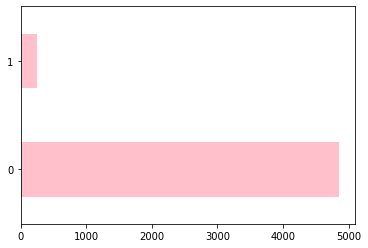

In [ ]:
# number of the people that had stroke(1) or not(0)
print(stroke['stroke'].value_counts())
stroke['stroke'].value_counts().plot.barh(color='pink')

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


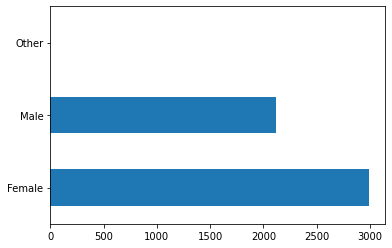

In [ ]:
# number of the each type of the gender
print(stroke.gender.value_counts())
stroke.gender.value_counts().plot.barh()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


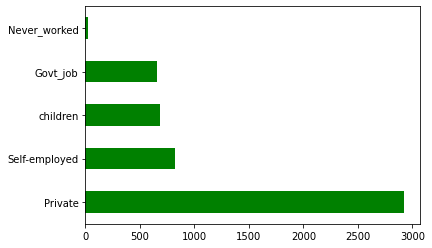

In [ ]:
# number of the each type of the work
print(stroke.work_type.value_counts())
stroke.work_type.value_counts().plot.barh(color='green')

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


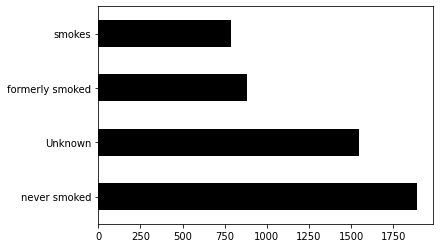

In [ ]:
# number of the each type of smoking status
print(stroke.smoking_status.value_counts())
stroke.smoking_status.value_counts().plot.barh(color='black')

In [ ]:
# number of the different type of the gender divided by smoking status
pd.crosstab(stroke["gender"] , stroke["smoking_status"])

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,836,477,1229,452
Male,708,407,663,337
Other,0,1,0,0


In [ ]:
# number of the different type of the gender divided by work types
pd.crosstab(stroke["gender"] , stroke["work_type"])

work_type,Govt_job,Never_worked,Private,Self-employed,children
gender,,,,,
Female,399,11,1754,504,326
Male,258,11,1170,315,361
Other,0,0,1,0,0


In [ ]:
# number of the different type of the gender divided by resident status
pd.crosstab(stroke["gender"] , stroke["Residence_type"])

Residence_type,Rural,Urban
gender,,
Female,1465,1529
Male,1048,1067
Other,1,0


In [ ]:
# number of the different type of the work types divided by smoking status
pd.crosstab(stroke["work_type"] , stroke["smoking_status"])

smoking_status,Unknown,formerly smoked,never smoked,smokes
work_type,,,,
Govt_job,122,133,282,120
Never_worked,8,0,14,0
Private,640,531,1211,543
Self-employed,156,208,331,124
children,618,13,54,2


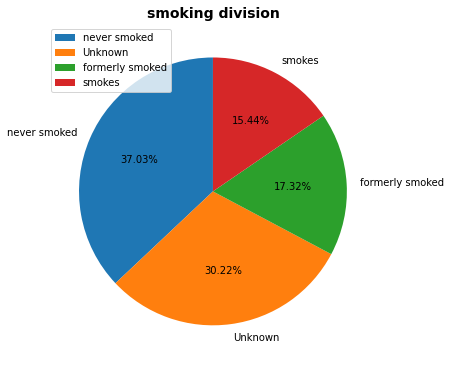

In [ ]:
 # showing the diiferent type of the smoking status on piechart
 lab = stroke['smoking_status'].value_counts()
 labels = lab.index
 plt.figure(figsize=(6,10))
 plt.pie(stroke['smoking_status'].value_counts().head(5),labels= labels, autopct='%.2f%%', startangle=90)
 plt.title('smoking division', fontweight='bold', fontsize=14)
 plt.legend()
 plt.legend(loc="upper left")
 plt.show()

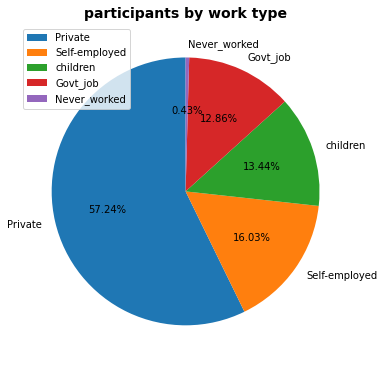

In [ ]:
 # showing the diiferent type of the work on piechart
 lab = stroke['work_type'].value_counts()
 labels = lab.index
 plt.figure(figsize=(6,10))
 plt.pie(stroke['work_type'].value_counts().head(5),labels= labels, autopct='%.2f%%', startangle=90)
 plt.title('participants by work type', fontweight='bold', fontsize=14)
 plt.legend()
 plt.legend(loc="upper left")
 plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

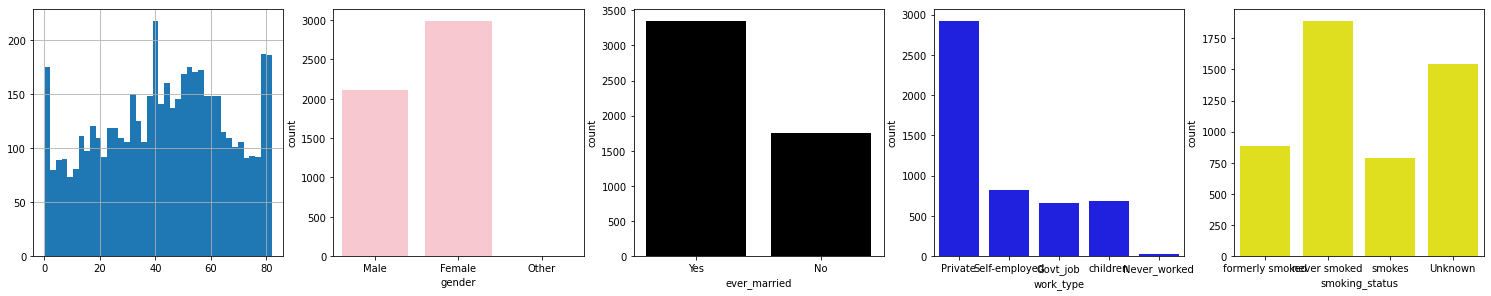

In [ ]:
# showing count plot of different items(columns)
plt.figure(figsize=[26,10])
plt.subplot(251)
stroke['age'].hist(bins=40)
plt.subplot(252)
sns.countplot( stroke['gender'] , color='pink')
plt.subplot(253)
sns.countplot( stroke['ever_married'] , color='black')
plt.subplot(254)
sns.countplot( stroke['work_type'] , color='blue')
plt.subplot(255)
sns.countplot( stroke['smoking_status'] , color='yellow')
plt.show()

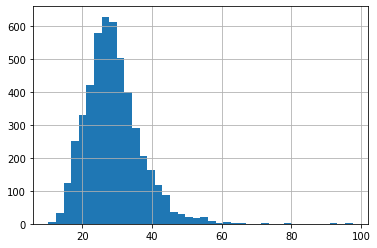

In [ ]:
# hist plot for bmi
stroke['bmi'].hist(bins=40)

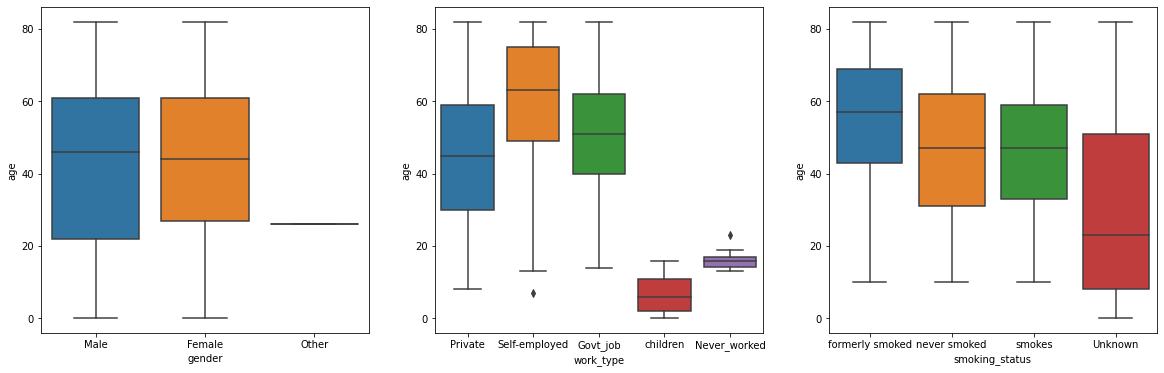

In [ ]:
# boxplot for different items
plt.figure(figsize=[20,6])
plt.subplot(131)
sns.boxplot(x='gender' , y='age' , data=stroke)
plt.subplot(132)
sns.boxplot(x='work_type' , y='age' , data=stroke)
plt.subplot(133)
sns.boxplot(x='smoking_status' , y='age' , data=stroke)
plt.show()

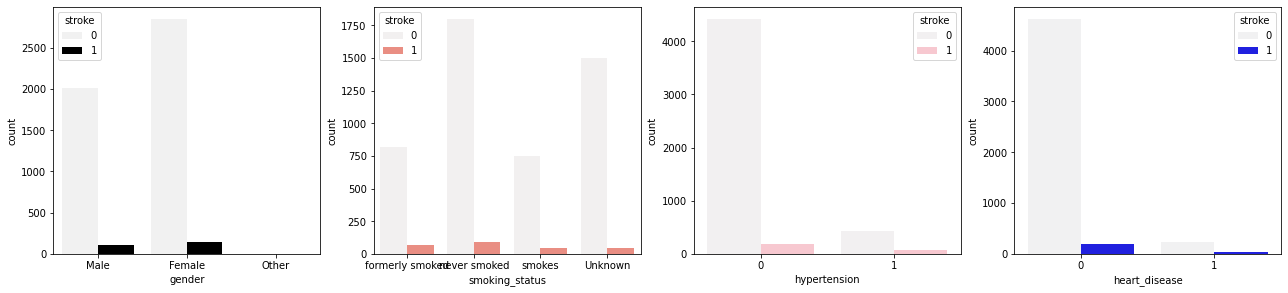

In [ ]:
plt.figure(figsize=[22,10])
plt.subplot(241)
sns.countplot(x='gender' ,hue='stroke', data=stroke , color= 'black')
plt.subplot(242)
sns.countplot(x='smoking_status' ,hue='stroke', data=stroke ,color='salmon')
plt.subplot(243)
sns.countplot(x='hypertension' ,hue='stroke', data=stroke ,color='pink')
plt.subplot(244)
sns.countplot(x='heart_disease' ,hue='stroke', data=stroke , color='blue')
plt.show()


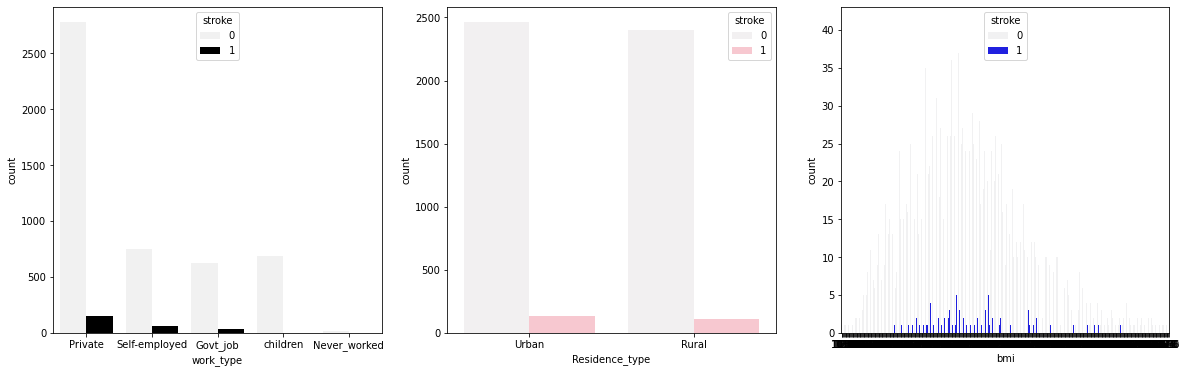

In [ ]:
plt.figure(figsize=[20,6])
plt.subplot(131)
sns.countplot(x='work_type' ,hue='stroke', data=stroke , color='black')
plt.subplot(132)
sns.countplot(x='Residence_type' ,hue='stroke', data=stroke , color='pink')
plt.subplot(133)
sns.countplot(x='bmi' ,hue='stroke', data=stroke , color='blue')
plt.show()


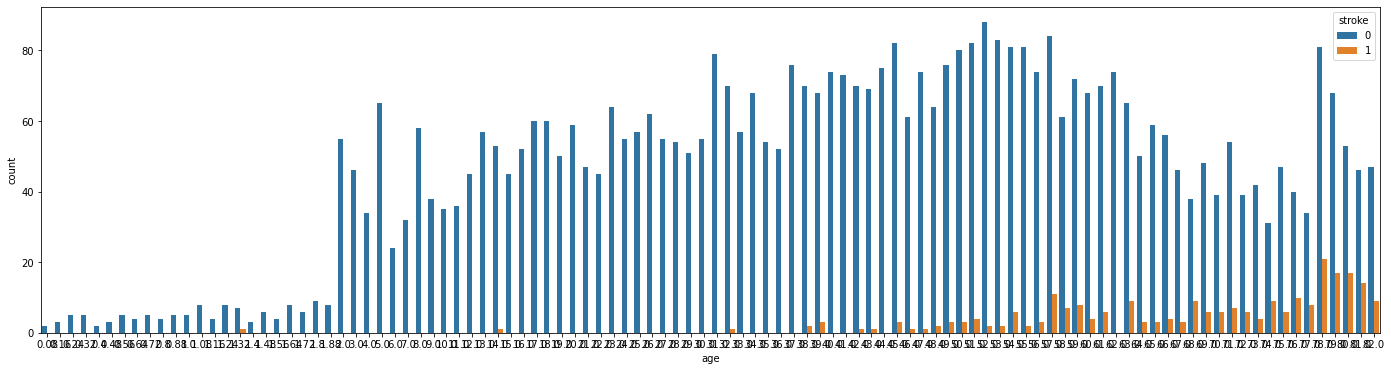

In [ ]:
plt.figure(figsize=[24,6])
sns.countplot(x='age' ,hue='stroke', data=stroke)

Text(0.5, 1.0, 'Density distributain of age')

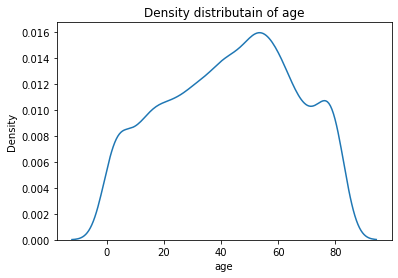

In [ ]:
# ploting the density distributain for age
sns.kdeplot(x=stroke['age'])
plt.title('Density distributain of age')

Text(0.5, 1.0, 'Density distributain of age more than 50')

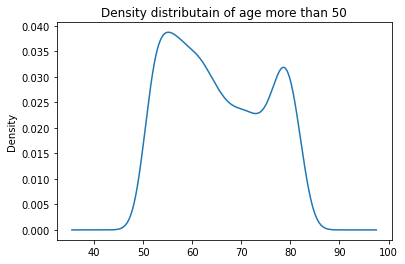

In [ ]:
# ploting the density distributain for age more than 50
stroke['age'].loc[stroke['age'] >50].plot(kind ='kde')
plt.title('Density distributain of age more than 50')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


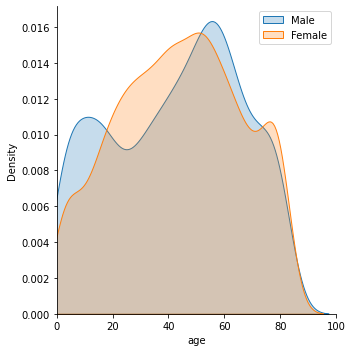

In [ ]:
# ploting the density distributain for age divided by gender
sns.FacetGrid(stroke, hue='gender', height=5, xlim=(0,100)).map(sns.kdeplot, 'age', shade=True)
plt.legend()
plt.show()

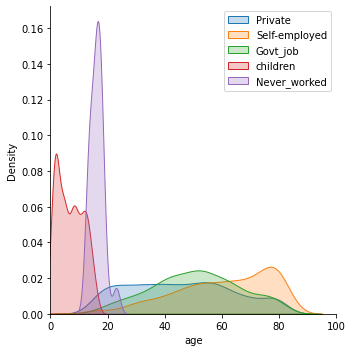

In [ ]:
# ploting the density distributain for age divided by work type
sns.FacetGrid(stroke, hue='work_type', height=5, xlim=(0,100)).map(sns.kdeplot, 'age', shade=True)
plt.legend()
plt.show()

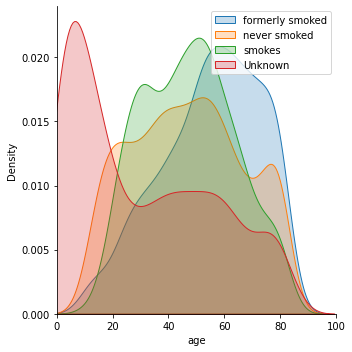

In [ ]:
# ploting the density distributain for age divided by smoking status
sns.FacetGrid(stroke, hue='smoking_status', height=5, xlim=(0,100)).map(sns.kdeplot, 'age', shade=True)
plt.legend()
plt.show()

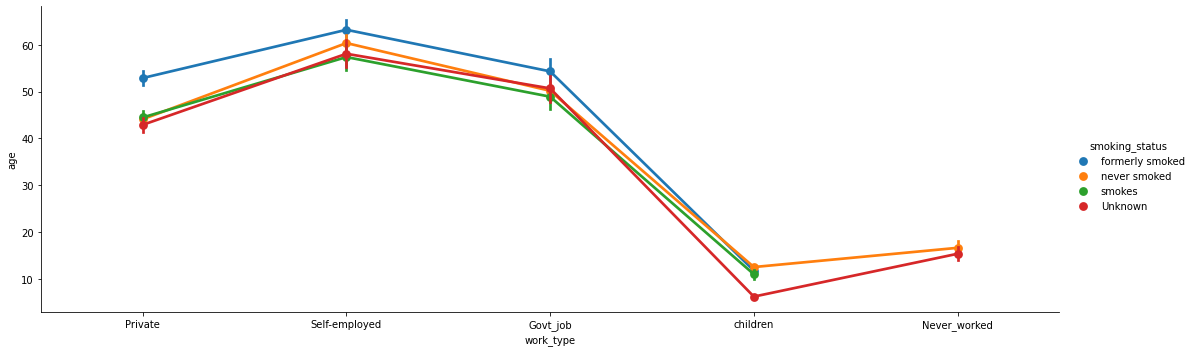

In [ ]:
# showing the conection between work and age and smoking status
sns.catplot(x='work_type', y='age', hue='smoking_status', kind='point', height=5, aspect=15/5, data=stroke)

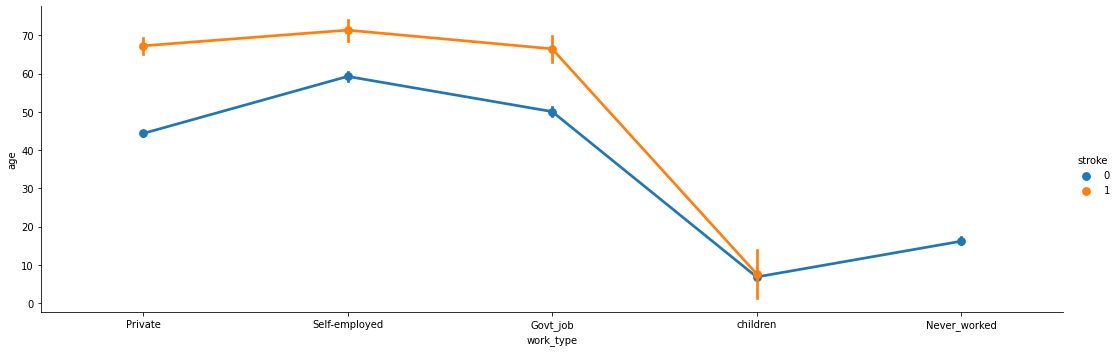

In [ ]:
# showing the conection between work and age and our target(stroke)
sns.catplot(x='work_type', y='age', hue='stroke', kind='point', height=5, aspect=15/5, data=stroke)

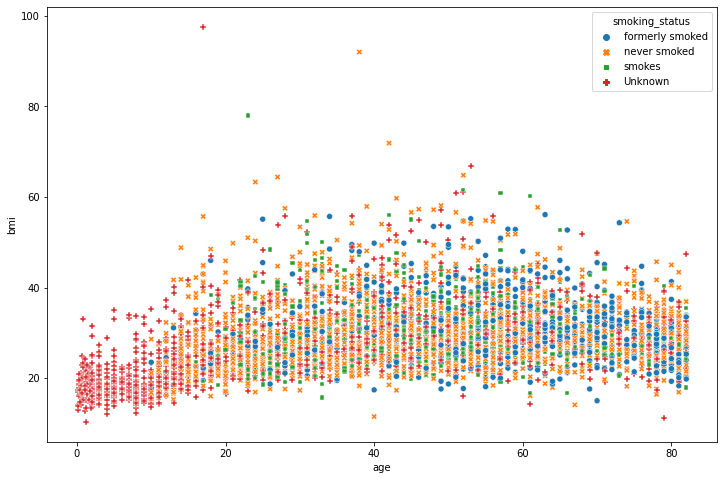

In [ ]:
# showing the conection between bmi and age and amoking status
plt.figure(figsize=[12,8])
sns.scatterplot(x='age', y='bmi', hue='smoking_status',style='smoking_status',data=stroke)

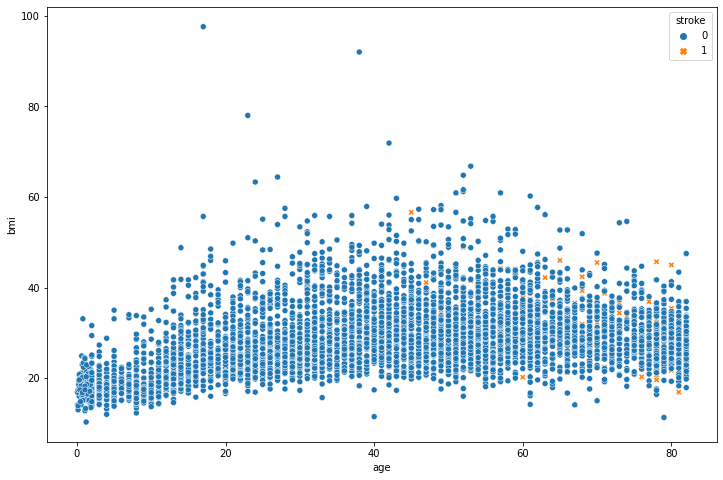

In [ ]:
# showing the conection between bmi and age and our target(stroke)
plt.figure(figsize=[12,8])
sns.scatterplot(x='age', y='bmi', hue='stroke',style='stroke',data=stroke)

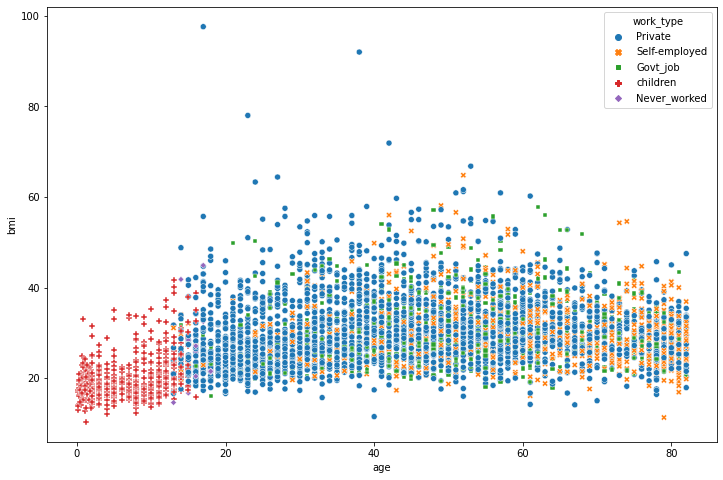

In [ ]:
# showing the conection between work and age and bmi
plt.figure(figsize=[12,8])
sns.scatterplot(x='age', y='bmi', hue='work_type',style='work_type',data=stroke)

In [ ]:
# corelation between columns
stroke.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


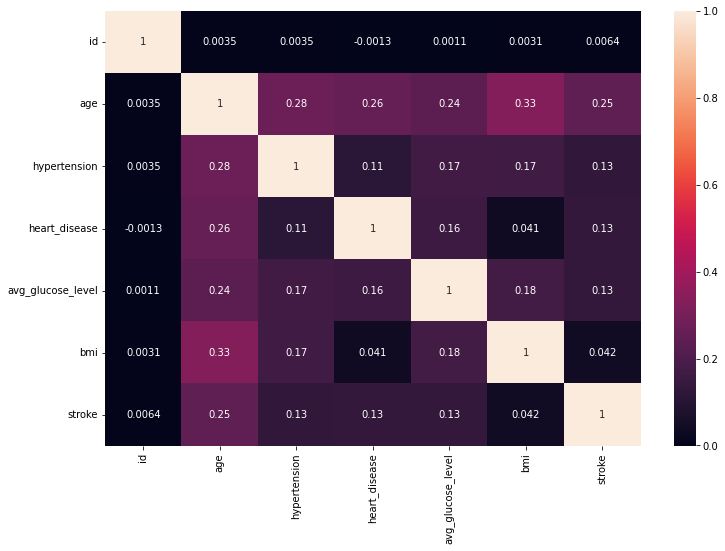

In [ ]:
# showing the corellation amounge items 
plt.figure(figsize=(12,8))
sns.heatmap(stroke.corr(), annot=True)

# **Cleaning data**

In [ ]:
# the count of empty values
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

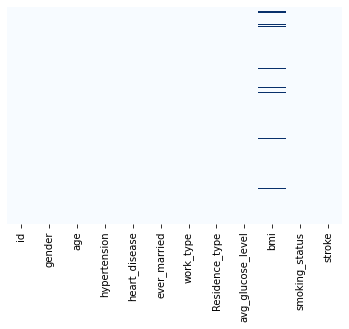

In [ ]:
# showing the nun values with blue color
sns.heatmap(stroke.isnull() , yticklabels=False ,cbar=False ,cmap='Blues')

In [ ]:
# counting the number of null values of bmi column
stroke['bmi'].isnull().sum()

201

In [ ]:
# removing that values that thay are empty
stroke.dropna(subset=['bmi'], inplace=True)

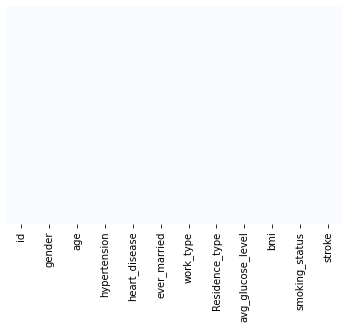

In [ ]:
sns.heatmap(stroke.isnull() , yticklabels=False ,cbar=False ,cmap='Blues')

In [ ]:
hadstroke = stroke[stroke['stroke']==1]
hadntstroke = stroke[stroke['stroke']==0]

In [ ]:
# the number of total and stroke and not stroke after draping the nun values
print('total =' , len(stroke))
print('number of people who had stroke  =' ,len(hadstroke) )
print('number of people who hadnot stroke =' ,len(hadntstroke) )

total = 4909
number of people who had stroke  = 209
number of people who hadnot stroke = 4700


In [ ]:
# droping the colums that thay are not important for prediction
stroke = stroke.drop(['id'] , axis=1)

# **More exploration on data**

In [ ]:
stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


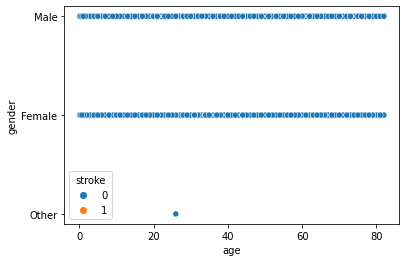

In [ ]:
# showing the scatter plot between gender and age divided by our target(stroke)
sns.scatterplot(x= stroke['age'] ,y=stroke['gender'] , hue=stroke['stroke'])

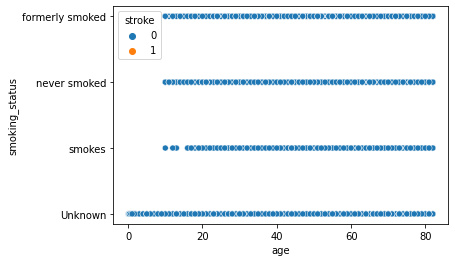

In [ ]:
# showing the scatter plot between smoking status and age divided by our target(stroke)
sns.scatterplot(x= stroke['age'] ,y=stroke['smoking_status'] , hue=stroke['stroke'])

In [ ]:
# calculating the count of the different type of gender that thay had stroke
grouped = stroke.groupby('gender')
grouped_sum = grouped['stroke'].sum()
print(grouped_sum)
print(grouped_sum/209*100)
a = grouped_sum[0]
b = grouped_sum[1]


gender
Female    120
Male       89
Other       0
Name: stroke, dtype: int64
gender
Female    57.416268
Male      42.583732
Other      0.000000
Name: stroke, dtype: float64


<BarContainer object of 2 artists>

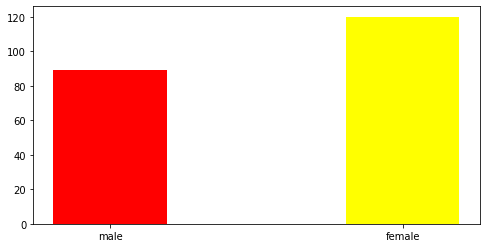

In [ ]:
barplot([120,89],['female','male'])

In [ ]:
# calculating the two range of the age that they had stroke
minoo = stroke[(stroke['stroke'] == 1) & (stroke['age'] >50)]
arpi = stroke[(stroke['stroke'] == 1) & (stroke['age'] <50)]
c=len(minoo)
d=len(arpi)

In [ ]:
c,d

(188, 18)

<BarContainer object of 2 artists>

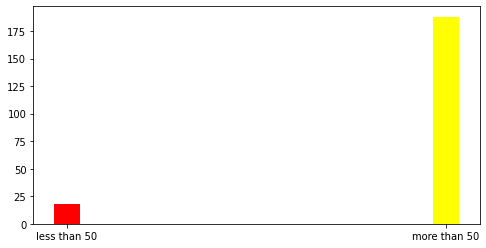

In [ ]:
barplot([c,d],['more than 50','less than 50'])

In [ ]:
# calculating the count of the different type of hypertension that thay had stroke
grouped = stroke.groupby('hypertension')
grouped_sum = grouped['stroke'].sum()
print(grouped_sum)
print(grouped_sum/209*100)
b = grouped_sum[0]
e = grouped_sum[1]


hypertension
0    149
1     60
Name: stroke, dtype: int64
hypertension
0    71.291866
1    28.708134
Name: stroke, dtype: float64


In [ ]:
b,e

(149, 60)

<BarContainer object of 2 artists>

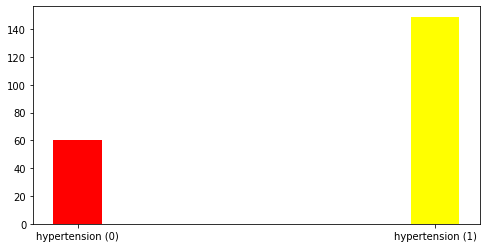

In [ ]:
barplot([b,e],['hypertension (1)','hypertension (0)'])

In [ ]:
# calculating the count of the different type of heart disease that thay had stroke
grouped = stroke.groupby('heart_disease')
grouped_sum = grouped['stroke'].sum()
print(grouped_sum)
print(grouped_sum/209*100)
f = grouped_sum[0]
g = grouped_sum[1]


heart_disease
0    169
1     40
Name: stroke, dtype: int64
heart_disease
0    80.861244
1    19.138756
Name: stroke, dtype: float64


<BarContainer object of 2 artists>

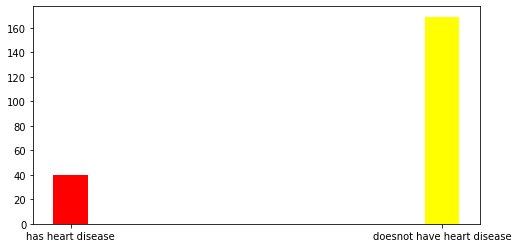

In [ ]:
barplot([f,g],['doesnot have heart disease','has heart disease'])

In [ ]:
# explane the meaning of heart disease numbers
minoo = stroke[(stroke['stroke'] == 0) & (stroke['heart_disease'] ==0 )]
arpi = stroke[(stroke['stroke'] == 0) & (stroke['heart_disease'] ==1 )]
arpi1 = stroke[(stroke['stroke'] == 1) & (stroke['heart_disease'] ==0 )]
arpi2 = stroke[(stroke['stroke'] == 1) & (stroke['heart_disease'] ==1 )]
print(len(minoo))
print(len(arpi))
print(len(arpi1))
print(len(arpi2))


4497
203
169
40


In [ ]:
# calculating the count of the different type of marrage station that thay had stroke
grouped = stroke.groupby('ever_married')
grouped_sum = grouped['stroke'].sum()
print(grouped_sum)
print(grouped_sum/209*100)
f = grouped_sum[0]
g = grouped_sum[1]


ever_married
No      23
Yes    186
Name: stroke, dtype: int64
ever_married
No     11.004785
Yes    88.995215
Name: stroke, dtype: float64


<BarContainer object of 2 artists>

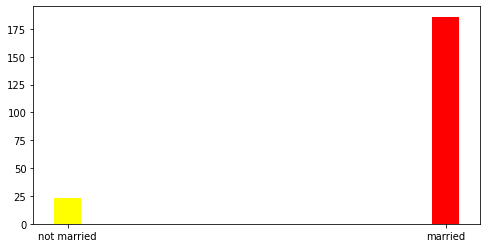

In [ ]:
barplot([f,g],['not married','married'])

In [ ]:
# calculating the count of the different type of worke that thay had stroke
grouped = stroke.groupby('work_type')
grouped_sum = grouped['stroke'].sum()
print(grouped_sum)
print(grouped_sum/209*100)
f = grouped_sum[0]
g = grouped_sum[1]
p = grouped_sum[2]
h = grouped_sum[3]
l= grouped_sum[4]


work_type
Govt_job          28
Never_worked       0
Private          127
Self-employed     53
children           1
Name: stroke, dtype: int64
work_type
Govt_job         13.397129
Never_worked      0.000000
Private          60.765550
Self-employed    25.358852
children          0.478469
Name: stroke, dtype: float64


<BarContainer object of 5 artists>

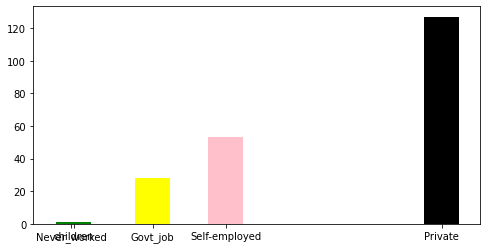

In [ ]:
barplot([f,g,p,h,l],['Govt_job','Never_worked','Private','Self-employed','children'])

In [ ]:
# calculating the count of the different type of residence that thay had stroke
grouped = stroke.groupby('Residence_type')
grouped_sum = grouped['stroke'].sum()
print(grouped_sum)
print(grouped_sum/209*100)
h = grouped_sum[0]
l= grouped_sum[1]


Residence_type
Rural    100
Urban    109
Name: stroke, dtype: int64
Residence_type
Rural    47.84689
Urban    52.15311
Name: stroke, dtype: float64


<BarContainer object of 2 artists>

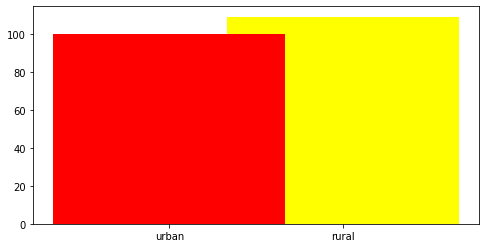

In [ ]:
barplot([l,h],['rural','urban'])

In [ ]:
# calculating the count of the different type of smoke status that thay had stroke
grouped = stroke.groupby('smoking_status')
grouped_sum = grouped['stroke'].sum()
print(grouped_sum)
print(grouped_sum/209*100)
g = grouped_sum[0]
p = grouped_sum[1]
h = grouped_sum[2]
l= grouped_sum[3]


smoking_status
Unknown            29
formerly smoked    57
never smoked       84
smokes             39
Name: stroke, dtype: int64
smoking_status
Unknown            13.875598
formerly smoked    27.272727
never smoked       40.191388
smokes             18.660287
Name: stroke, dtype: float64


<BarContainer object of 4 artists>

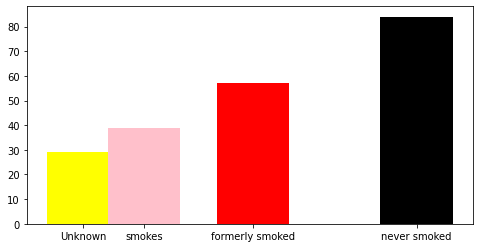

In [ ]:
barplot([g,p,h,l],['Unknown','formerly smoked','never smoked','smokes'])

# **working on data and prediction**

In [ ]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3734,239,1,1
2,1,101,0,1,1,2,0,2429,198,2,1
3,0,70,0,0,1,2,1,3309,217,3,1
4,0,100,1,0,1,3,0,3318,113,2,1
5,1,102,0,0,1,2,1,3367,163,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,34,0,0,0,4,0,2324,59,0,0
5106,0,102,0,0,1,3,1,2960,273,2,0
5107,0,56,0,0,1,3,0,1290,179,2,0
5108,1,72,0,0,1,2,0,3289,129,1,0


In [ ]:
# converting the string in columns to integer
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in stroke.columns:
     stroke[col] = le.fit_transform(stroke[col])

In [ ]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3734,239,1,1
2,1,101,0,1,1,2,0,2429,198,2,1
3,0,70,0,0,1,2,1,3309,217,3,1
4,0,100,1,0,1,3,0,3318,113,2,1
5,1,102,0,0,1,2,1,3367,163,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,34,0,0,0,4,0,2324,59,0,0
5106,0,102,0,0,1,3,1,2960,273,2,0
5107,0,56,0,0,1,3,0,1290,179,2,0
5108,1,72,0,0,1,2,0,3289,129,1,0


In [ ]:
# saving our new dataset
stroke.to_csv('file_stroke.csv')

In [ ]:
x=stroke.drop('stroke' ,axis=1).values
y=stroke['stroke'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=0)

In [ ]:
unique, counts = np.unique( y_train, return_counts=True)
print (np.asarray((unique, counts)).T)
unique, counts = np.unique( y_test, return_counts=True)
print (np.asarray((unique, counts)).T)

[[   0 3761]
 [   1  166]]
[[  0 939]
 [  1  43]]


In [ ]:
from collections import Counter
from numpy import where
import matplotlib.pyplot as plt

In [ ]:
counter = Counter(y_train)

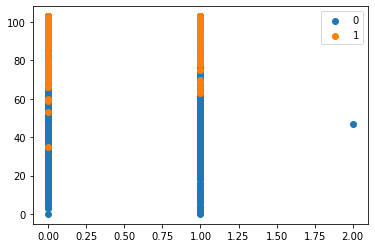

In [ ]:
for label, _ in counter.items():
 row_ix = where(y_train == label)
 plt.scatter(x_train[row_ix, 0], x_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

our data is not balance so we use SMOTE to balance data.
What is SMOTE? https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(x_train,y_train)

In [ ]:
unique, counts = np.unique( y_res, return_counts=True)
print (np.asarray((unique, counts)).T)
unique, counts = np.unique( y_test, return_counts=True)
print (np.asarray((unique, counts)).T)

[[   0 3761]
 [   1 3761]]
[[  0 939]
 [  1  43]]


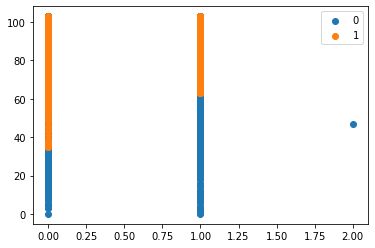

In [ ]:
counter = Counter(y_res)
for label, _ in counter.items():
 row_ix = where(y_res == label)[0]
 plt.scatter(X_res[row_ix, 0], X_res[row_ix, 1], label=str(label))
plt.legend()
plt.show()

**LogesticRegration Model**

In [ ]:
# we use this model before balancing ---> the prediction in our stroke = 1 is bad 
from sklearn.linear_model import LogisticRegression
lo= LogisticRegression(random_state=0)
lo.fit(x_train, y_train)
y_predict = lo.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.20      0.02      0.04        43

    accuracy                           0.95       982
   macro avg       0.58      0.51      0.51       982
weighted avg       0.92      0.95      0.94       982



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


col_0,0,1
row_0,,
0,935,4
1,42,1


In [ ]:
# after balancing the data ---> our result in prediction is better
from sklearn.linear_model import LogisticRegression
lo= LogisticRegression(random_state=0)
lo.fit(X_res, y_res)
y_predict = lo.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.98      0.73      0.84       939
           1       0.09      0.60      0.16        43

    accuracy                           0.73       982
   macro avg       0.54      0.67      0.50       982
weighted avg       0.94      0.73      0.81       982



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


col_0,0,1
row_0,,
0,690,249
1,17,26


In [ ]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test, y_predict)
a

0.7291242362525459

In [ ]:
 # ( True Positive , False Negative , True Negative , False Positive )
 perf_measure(y_test, y_predict)

(26, 249, 690, 17)

In [ ]:
# true positive
a1 = truepositive(y_test, y_predict)
a1

26

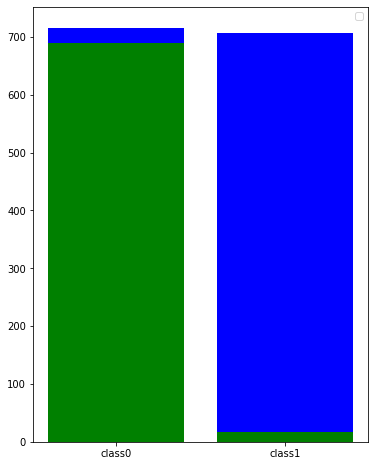

In [ ]:
stackbar(y_test, y_predict)

so we prefer to use SMOTE and balancing our data

**K_nearestneighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors = 5 , metric= 'minkowski' , p=2)
classifier.fit(X_res, y_res)
y_predict = classifier.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       939
           1       0.09      0.53      0.15        43

    accuracy                           0.74       982
   macro avg       0.53      0.64      0.50       982
weighted avg       0.93      0.74      0.81       982



col_0,0,1
row_0,,
0,702,237
1,20,23


In [ ]:
from sklearn.metrics import accuracy_score
b=accuracy_score(y_test, y_predict)
b

0.7382892057026477

In [ ]:
 perf_measure(y_test, y_predict)

(23, 237, 702, 20)

In [ ]:
b1 = truepositive(y_test, y_predict)
b1

23

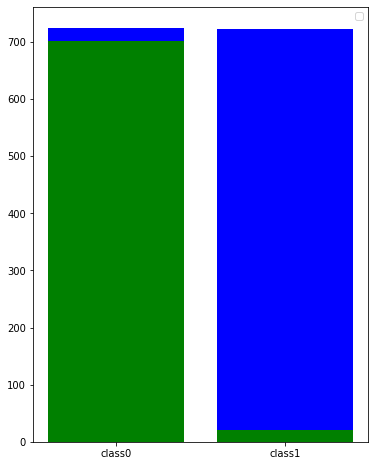

In [ ]:
stackbar(y_test, y_predict)

**Decision Trees and random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=100 , criterion='entropy')
random.fit(X_res, y_res)
y_predict= random.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       939
           1       0.13      0.28      0.18        43

    accuracy                           0.89       982
   macro avg       0.55      0.60      0.56       982
weighted avg       0.93      0.89      0.91       982



col_0,0,1
row_0,,
0,861,78
1,31,12


In [ ]:
from sklearn.metrics import accuracy_score
c=accuracy_score(y_test, y_predict)
c

0.8890020366598778

In [ ]:
 perf_measure(y_test, y_predict)

(12, 78, 861, 31)

In [ ]:
c1 = truepositive(y_test, y_predict)
c1

12

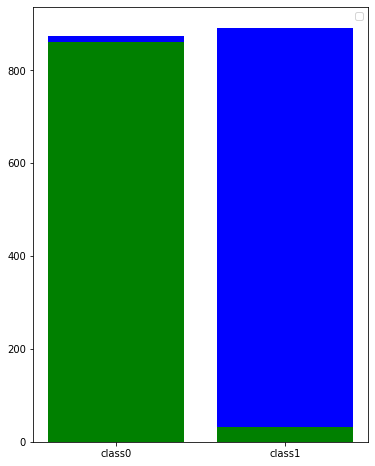

In [ ]:
stackbar(y_test, y_predict)

**Naive bayes classification**

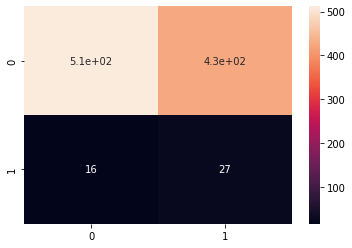

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_res, y_res)
y_predict=classifier.predict(x_test)
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm, annot=True )

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.97      0.55      0.70       939
           1       0.06      0.63      0.11        43

    accuracy                           0.55       982
   macro avg       0.51      0.59      0.40       982
weighted avg       0.93      0.55      0.67       982



col_0,0,1
row_0,,
0,512,427
1,16,27


In [ ]:
from sklearn.metrics import accuracy_score
d=accuracy_score(y_test, y_predict)
d

0.5488798370672098

In [ ]:
perf_measure(y_test, y_predict)

(27, 427, 512, 16)

In [ ]:
d1 = truepositive(y_test, y_predict)
d1

27

**xgboost**

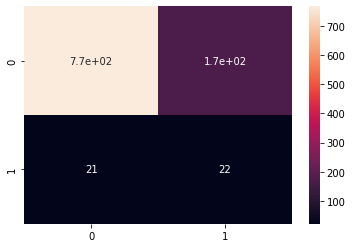

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_res, y_res)
y_predict=model.predict(x_test)
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm, annot=True )

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       939
           1       0.11      0.51      0.19        43

    accuracy                           0.80       982
   macro avg       0.54      0.66      0.54       982
weighted avg       0.94      0.80      0.86       982



col_0,0,1
row_0,,
0,768,171
1,21,22


In [ ]:
from sklearn.metrics import accuracy_score
e=accuracy_score(y_test, y_predict)
e

0.8044806517311609

In [ ]:
perf_measure(y_test, y_predict)

(22, 171, 768, 21)

In [ ]:
e1 = truepositive(y_test, y_predict)
e1

22

**catboost**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Learning rate set to 0.024385
0:	learn: 0.6746014	total: 3.13ms	remaining: 3.13s
1:	learn: 0.6593627	total: 5.73ms	remaining: 2.86s
2:	learn: 0.6438644	total: 8.53ms	remaining: 2.83s
3:	learn: 0.6295818	total: 10.9ms	remaining: 2.71s
4:	learn: 0.6158568	total: 13.7ms	remaining: 2.72s
5:	learn: 0.6021575	total: 16.4ms	remaining: 2.71s
6:	learn: 0.5902740	total: 18.7ms	remaining: 2.66s
7:	learn: 0.5770570	total: 22.2ms	remaining: 2.75s
8:	learn: 0.5663763	total: 25ms	remaining: 2.75s
9:	learn: 0.5543209	total: 27.2ms	remaining: 2.7s
10:	learn: 0.5461117	total: 29.6ms	remaining: 2.66s
11:	learn: 0.5385341	total: 33ms	remaining: 2.72s
12:	learn: 0.5294256	total: 35.9ms	remaining: 2.72s
13:	learn: 0.5221924	total: 38.4ms	remaining: 2.7s
14:	learn: 0.5141617	total: 41ms	remaining: 2.69s
15:	learn: 0.5060374	total: 43.6ms	remaining: 2.68s
16:	learn: 0.4994192	total: 47.1ms	remaining: 2.72s
17:	learn: 0.4928460	total: 50.1ms	remaining: 2.73s
18:	learn: 0.4871909	total: 52.7ms	remaining: 2.72s


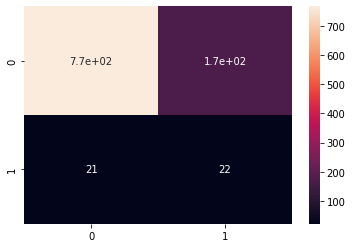

In [ ]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
cat.fit(X_res,y_res)
y_predict=model.predict(x_test)
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm, annot=True )

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       939
           1       0.11      0.51      0.19        43

    accuracy                           0.80       982
   macro avg       0.54      0.66      0.54       982
weighted avg       0.94      0.80      0.86       982



col_0,0,1
row_0,,
0,768,171
1,21,22


In [ ]:
from sklearn.metrics import accuracy_score
f=accuracy_score(y_test, y_predict)
f

0.8044806517311609

In [ ]:
perf_measure(y_test, y_predict)

(22, 171, 768, 21)

In [ ]:
f1 = truepositive(y_test, y_predict)
f1

22

**gaussianNB**

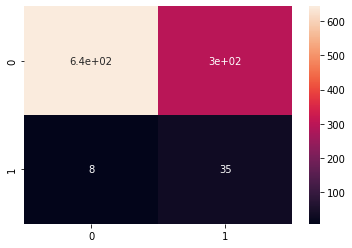

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_res,y_res)
y_predict = model.predict(x_test)
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm, annot=True )

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.99      0.68      0.81       939
           1       0.11      0.81      0.19        43

    accuracy                           0.69       982
   macro avg       0.55      0.75      0.50       982
weighted avg       0.95      0.69      0.78       982



col_0,0,1
row_0,,
0,643,296
1,8,35


In [ ]:
from sklearn.metrics import accuracy_score
g=accuracy_score(y_test, y_predict)
g

0.6904276985743381

In [ ]:
perf_measure(y_test, y_predict)

(35, 296, 643, 8)

In [ ]:
g1 = truepositive(y_test, y_predict)
g1

35

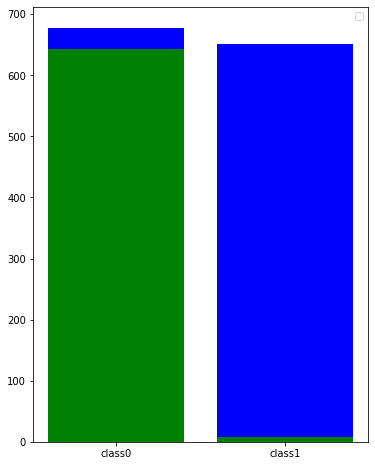

In [ ]:
stackbar(y_test, y_predict)

# **Result of our prediction**

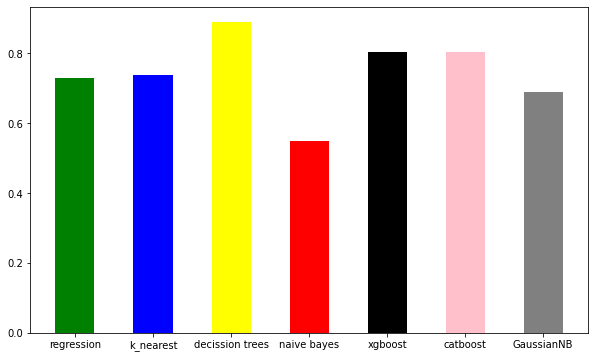

In [ ]:
# totall accuracy 
plt.figure(figsize=[10,6])
left=[1,2,3,4,5,6,7]
high=[a,b,c,d,e,f,g]
tic=['regression' , 'k_nearest' , 'decission trees' , 'naive bayes', 'xgboost' , 'catboost','GaussianNB']
plt.bar(left, high ,tick_label=tic  ,width=0.5 ,color=['green' , 'blue' ,'yellow' ,'red','black','pink','gray'])
plt.show()

<BarContainer object of 7 artists>

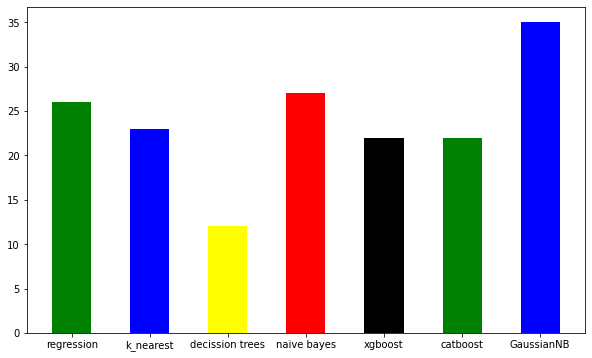

In [ ]:
# class 1
plt.figure(figsize=[10,6])
left=[1,2,3,4,5,6,7]
high=[a1,b1,c1,d1,e1,f1,g1]
tic=['regression' , 'k_nearest' , 'decission trees' ,'naive bayes', 'xgboost' , 'catboost','GaussianNB']
plt.bar(left, high ,tick_label=tic  ,width=0.5 ,color=['green' , 'blue' ,'yellow' ,'red','black'])

Best Model for our data is decission trees but GaussianNB classification model is the best model for predict our lowes class(class 1).

In [ ]:
from sklearn import datasets
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
rf_predict=lo.predict(x_test)
nb_predict=classifier.predict(x_test)
lg_predict=random.predict(x_test)
kn_predict=classifier.predict(x_test)
xg_predict=model.predict(x_test)
ca_predict=cat.predict(x_test)
ga_predict=model.predict(x_test)

In [ ]:
rf_auc=roc_auc_score(y_test,rf_predict)
nb_auc=roc_auc_score(y_test,nb_predict)
lg_auc=roc_auc_score(y_test,lg_predict)
kn_auc=roc_auc_score(y_test,kn_predict)
xg_auc=roc_auc_score(y_test,xg_predict)
ca_auc=roc_auc_score(y_test,ca_predict)
ga_auc=roc_auc_score(y_test,ga_predict)

In [ ]:
rf_fpr,rf_tpr,_ =roc_curve(y_test,rf_predict)
nb_fpr,nb_tpr,_ =roc_curve(y_test,nb_predict)
lg_fpr,lg_tpr,_ =roc_curve(y_test,lg_predict)
kn_fpr,kn_tpr,_ =roc_curve(y_test,kn_predict)
xg_fpr,xg_tpr,_ =roc_curve(y_test,xg_predict)
ca_fpr,ca_tpr,_ =roc_curve(y_test,ca_predict)
ga_fpr,ga_tpr,_ =roc_curve(y_test,ga_predict)


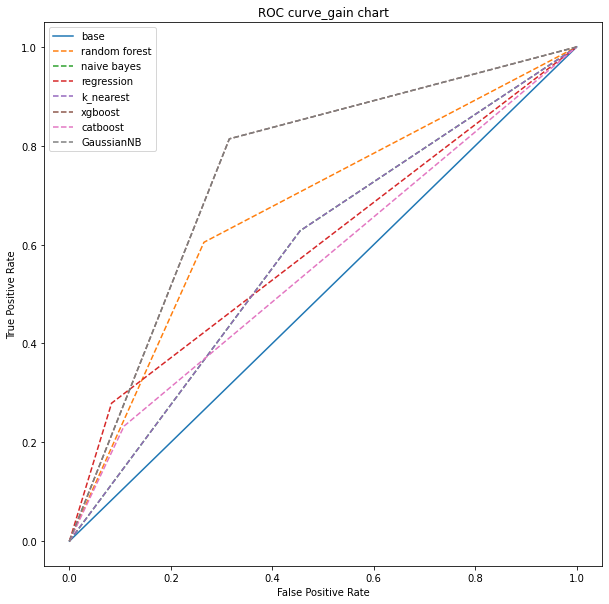

In [ ]:
plt.subplots(1, figsize=(10,10))
r=[0,0.5,1]
p=r
plt.plot(r,p , linestyle='-', label='base')
plt.plot(rf_fpr,rf_tpr , linestyle='--' , label='random forest')
plt.plot(nb_fpr,nb_tpr , linestyle='--' , label='naive bayes')
plt.plot(lg_fpr,lg_tpr , linestyle='--' , label='regression')
plt.plot(kn_fpr,kn_tpr , linestyle='--' , label='k_nearest')
plt.plot(xg_fpr,xg_tpr , linestyle='--' , label='xgboost')
plt.plot(ca_fpr,ca_tpr , linestyle='--' , label='catboost')
plt.plot(ga_fpr,ga_tpr , linestyle='--' , label='GaussianNB')


plt.title('ROC curve_gain chart')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# **useful functions**

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix 

In [ ]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1
    return(TP, FP, TN, FN)

In [ ]:
def truepositive(y_actual, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()
    return(tp)

In [ ]:
def stackbar(x,y):
   tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
   plt.figure(figsize=(6,8))
   x=['class0' , 'class1']
   y1=[tn , fn]
   y2=[tp , tn]
   plt.bar(x, y1, color='g')
   plt.bar(x, y2, bottom=y1, color='b')
   plt.legend()
   plt.show()

In [ ]:
def barplot(a,b):
  plt.figure(figsize=[8,4])
  left=[]
  high=[]
  for i in a:
    left.append(i)
  for j in b:
      high.append(j)
  return(plt.bar(left, left ,tick_label=high, width=12  ,color=['yellow' ,'red','black','pink','green'])) 